# Multiple Linear Regression (LR)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.linear_model import LinearRegression

Import OSNIR Dataset and shuffle data

In [2]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_Shuffled_Data.csv')

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [3]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the Multiple Linear Regression Model

Equation taken into account:\
First Order Polynomial
$$y = b_0 + b_1*x_1 + b_2*x_2 + ... + b_n*x_n$$

where $y$ is the predicted value of the dependent variable,\
$x1$ through $x_n$ are n distinct independent or predictor variables,\
$b_0$ is the value of $y$ when all of the independent values are equal to zero,\
and $b1$ through $b_n$ are the estimated regression coefficients.


In [4]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [5]:
OSNIR_num = data[:3000-1,0]
Input_num = data[:3000-1,1:7]

In [6]:
OSNIR_est = (model.predict(Input_num))

In [7]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[33.0, 3.0, 100.0, 50.0, 0.0, 9.0] => 9.056658 (expected 9.936834)
[6.0, -1.0, 50.0, 25.0, 0.0, 9.0] => 23.130880 (expected 23.857060)
[12.0, -5.0, 50.0, 25.0, 0.0, 3.0] => 22.841010 (expected 22.358241)
[16.0, 3.0, 10.0, 25.0, 12.5, 9.0] => 23.145492 (expected 17.954984)
[10.0, -1.0, 100.0, 25.0, 0.0, 9.0] => 15.930451 (expected 16.183496)
[7.0, 2.0, 100.0, 25.0, 0.0, 9.0] => 16.883344 (expected 16.091254)
[7.0, -2.0, 100.0, 25.0, 0.0, 3.0] => 18.337415 (expected 17.885832)
[13.0, 3.0, 100.0, 25.0, 12.5, 9.0] => 13.149419 (expected 13.479461)
[15.0, -6.0, 5.0, 25.0, 0.0, 9.0] => 25.814119 (expected 29.028905)
[14.0, -1.0, 50.0, 25.0, 0.0, 9.0] => 20.805625 (expected 19.840868)


In [8]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [9]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_LR.csv",index=False)

(array([0.01033678, 0.00766922, 0.01000333, 0.00966989, 0.00966989,
        0.01300433, 0.01733911, 0.01667222, 0.02200734, 0.02367456,
        0.02200734, 0.01900634, 0.02500834, 0.02567523, 0.02334111,
        0.03267756, 0.03034345, 0.02934311, 0.03201067, 0.03467823,
        0.036012  , 0.03167723, 0.03434478, 0.02667556, 0.03467823,
        0.03334445, 0.02667556, 0.027009  , 0.02734245, 0.02067356,
        0.021007  , 0.02800934, 0.02367456, 0.02200734, 0.01533845,
        0.01367122, 0.01433811, 0.00966989, 0.00833611, 0.00500167]),
 array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
        -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
         0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
         2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]),
 <BarContainer object of 40 artists>)

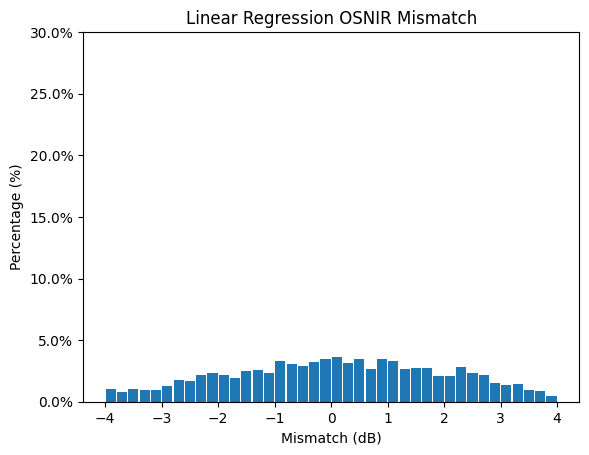

In [10]:
plt.title('Linear Regression OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.ylim(0, 0.3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism,
         range=(-4,4),
         rwidth=0.9,
         bins=40,
         weights=np.ones(len(Mism))/len(Mism)
         )